In [2]:
import numpy as np
from torchvision.models.swin_transformer import swin_b, Swin_B_Weights
import torch

In [3]:
model = swin_b(weights=Swin_B_Weights.IMAGENET1K_V1)

In [4]:
model(torch.randn((1, 3, 224, 224))).shape

torch.Size([1, 1000])

In [5]:
torch.nn.Sequential(*list(model.children())[:-1])(torch.randn((1, 3, 224, 224))).shape

torch.Size([1, 7, 1, 1])

In [6]:
model.head = torch.nn.Identity()
model(torch.randn((1, 3, 224, 224))).shape

torch.Size([1, 1024])

In [7]:
from dataset import YouTubeDataset, download_videos

# download_videos('data\\youtube.csv', 'data\\videos')

In [8]:
ytdataset = YouTubeDataset(root='data')
# ytdataset.download_videos()

In [9]:
import cv2

cap = cv2.VideoCapture(
    "data/videos/art_music/(484) Marianas Bloom Swipe! Fantasy Acrylic Pour Painting! Harmony House Art.3gpp")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(length, fps)

3370 7


In [1]:
from utils import convert_videos_to_embeddings

convert_videos_to_embeddings(videos_dir='data/videos/', dir_to_load='data/', file_name='embeddings_4', count=1000)

Found directories/labels: art_music, food, history, travel


  0%|          | 0/45962 [00:00<?, ?it/s]
Progress: 25/1732: 183it [00:11, 15.72it/s, Video category: art_music]                         
Progress: 101/1732:  97%|█████████▋| 666/688 [00:41<00:01, 15.96it/s, Video category: art_music]
Progress: 102/1732: 291it [00:18, 15.70it/s, Video category: history]                         
Progress: 108/1732:  93%|█████████▎| 1479/1584 [01:35<00:06, 15.55it/s, Video category: travel]


Error opening video stream or file: data/videos/history\AskAbhijit 2 Indian History China Quantum Mechanics String Theory Sanskrit.3gpp


Progress: 178/1732:  92%|█████████▏| 429/464 [01:02<00:05,  6.92it/s, Video category: food]
Progress: 179/1732: 127it [00:18,  6.92it/s, Video category: history]                         
Progress: 180/1732:  92%|█████████▏| 814/886 [01:52<00:09,  7.26it/s, Video category: travel]
Progress: 181/1732: 546it [01:14,  7.31it/s, Video category: travel]                         
  0%|          | 0/2689 [00:00<?, ?it/s]
Progress: 187/1732: 446it [01:04,  6.90it/s, Video category: travel]                         
Progress: 192/1732:  93%|█████████▎| 964/1033 [02:17<00:09,  7.03it/s, Video category: history]
Progress: 193/1732: 197it [00:27,  7.28it/s, Video category: travel]                         
Progress: 194/1732: 215it [00:27,  7.70it/s, Video category: history]                         
Progress: 227/1732:  96%|█████████▌| 662/689 [01:32<00:03,  7.17it/s, Video category: history]
Progress: 228/1732: 22it [00:03,  6.47it/s, Video category: travel]                        
Progress: 231/1732

KeyboardInterrupt: 

In [3]:
import pandas as pd

train_data = pd.read_csv('data/embeddings_4_train.csv')

In [5]:
train_data.sample(n=10)

,id_video,prob_1,prob_2,prob_3,prob_4,0,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
92363,185.0,0.000000,0.045257,0.000000,0.954743,0.467466,-0.600699,-0.064524,0.376413,-0.068793,...,0.412345,0.450144,-0.600133,-0.520319,-0.771693,0.466089,0.247871,-0.104830,0.616635,-0.328129
77727,150.0,0.000000,0.499053,0.000000,0.500947,0.262269,-0.456155,-0.042503,0.651579,0.213203,...,0.867257,0.355411,0.203387,-0.090610,-0.248212,-0.264797,-1.343360,-0.010906,-0.380042,1.474014
139350,278.0,0.000000,0.931581,0.000000,0.068419,-1.332942,-0.041151,0.203053,0.651909,0.446298,...,0.448418,0.108742,0.352745,-0.378012,-0.753991,0.104047,0.524538,1.070435,0.437897,0.541338
69000,137.0,0.000000,0.000000,0.921717,0.078283,0.425366,-0.465649,0.071921,0.002702,-0.165569,...,0.538711,0.020568,-0.440364,-0.081170,0.211666,0.290532,0.975800,-0.099532,0.017689,1.653601
89026,173.0,0.481692,0.000000,0.000000,0.518308,-0.992553,-0.738206,-0.120911,-0.425656,-0.219157,...,-0.521346,0.005987,-0.784533,-0.323727,0.599744,0.418889,-0.644446,-0.177309,-0.268331,0.961606
91260,183.0,0.000000,0.954743,0.045257,0.000000,-0.720938,-0.171053,0.813611,-0.528054,0.260393,...,0.413988,0.234117,-0.894479,0.818399,0.040712,0.631071,0.837460,-1.031578,-0.287701,-0.006030
78273,151.0,0.000000,0.000000,0.000000,1.000000,-0.957013,-0.882520,0.056991,0.454289,0.120172,...,-0.559451,-0.094861,-0.034048,-0.507262,0.951738,0.031587,-0.357187,-0.018120,-0.332243,0.625848
84369,162.0,0.777659,0.222341,0.000000,0.000000,-1.325772,-1.549626,0.049839,-0.912276,0.373589,...,0.105956,1.313978,-1.051894,0.810593,-0.393664,0.020662,0.087190,0.872844,-0.148570,2.081891
135297,271.0,0.000000,0.936080,0.000000,0.063920,-0.337102,0.062704,0.116531,0.877239,0.129245,...,0.110215,0.609147,0.639809,-0.102008,-0.252421,-0.269383,1.257458,0.772024,-0.178572,1.781861
96699,197.0,0.000000,0.107086,0.892914,0.000000,-0.131636,-0.164220,-0.013657,0.370069,-0.073336,...,0.153751,0.084073,-0.380775,-0.001490,0.109949,-0.613396,0.321450,0.449221,-0.076181,-0.904002


In [ ]:
import pandas as pd
import tqdm
import numpy as np

def to_table(filepath: str):
    table = pd.DataFrame(data=[], columns=['id_video', 'category_1', 'category_2', 'prob_1', 'prob_2'])
    index = 0
    with open(filepath, 'r') as file:
        with tqdm.tqdm() as t:
            while True:
                line = file.readline()
                if not line:
                    break
                line = line.strip()
                line = line.split(', ')
                id_video, category_1, category_2 = [int(float(value)) for value in line[:3]]
                prob_1, prob_2 = [float(value) for value in line[3:5]]
                embedding = np.array(line[5:], dtype=np.float32)
                table.loc[index, 'id_video'] = id_video
                table.loc[index, 'category_1'] = category_1
                table.loc[index, 'category_2'] = category_2
                table.loc[index, 'prob_1'] = prob_1
                table.loc[index, 'prob_2'] = prob_2
                table.loc[index, list(range(len(embedding)))] = np.reshape(embedding, newshape=(-1))
                index += 1
                t.set_description_str(filepath)
                t.update(1)
    return table

In [ ]:
train_table = to_table('data/embeddings_2_train.txt')

In [ ]:
train_table.to_csv('data/table.csv')
del train_table

In [ ]:
test_table = to_table('data/embeddings_2_test.txt')
test_table.to_csv('data/test.csv')
del test_table

In [ ]:
train_table.head()

In [1]:
import pandas as pd
train_table = pd.read_csv('data/embeddings_4_train.csv')
test_table = pd.read_csv('data/embeddings_4_test.csv')
train_table.head()

,id_video,prob_1,prob_2,prob_3,prob_4,0,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.000000,0.000000,0.244673,0.755327,-0.503650,-0.397155,-0.008947,0.397200,0.031454,...,0.125768,-0.259977,-0.142573,0.019537,-0.038435,-0.126272,0.172669,0.358814,0.201481,0.198124
1,0.0,0.000000,0.000000,0.000000,1.000000,-0.578005,0.312923,0.677774,0.700085,-0.123916,...,-0.587731,0.377209,-1.282490,0.850680,0.431195,-0.083100,0.980267,-0.398450,0.135988,1.201336
2,0.0,0.000000,0.209912,0.000000,0.790088,-0.420616,-0.163201,0.383056,0.409601,-0.056331,...,0.435935,-0.062051,-0.439511,0.060940,-0.350307,-0.616671,0.255240,-0.237184,-0.654566,1.048519
3,0.0,0.183909,0.000000,0.000000,0.816091,-0.765086,-0.403441,-0.225890,0.162760,0.303554,...,0.498021,-0.014023,-0.786539,0.308094,0.479664,-0.302341,0.980229,-0.228967,-0.531902,0.204382
4,0.0,0.000000,0.000000,0.000000,1.000000,-0.254308,-0.687083,-0.097403,0.424565,-0.139256,...,-0.191618,-0.574989,-0.248220,0.299354,-0.079344,0.160159,0.649951,-0.019299,-0.576247,0.413660


In [2]:
import numpy as np

train_table['category'] = np.argmax(train_table.loc[:, 'prob_1': 'prob_4'].values, axis=1)
test_table['category'] = np.argmax(test_table.loc[:, 'prob_1': 'prob_4'].values, axis=1)
train_table.head()

,id_video,prob_1,prob_2,prob_3,prob_4,0,1,2,3,4,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,category
0,0.0,0.000000,0.000000,0.244673,0.755327,-0.503650,-0.397155,-0.008947,0.397200,0.031454,...,-0.259977,-0.142573,0.019537,-0.038435,-0.126272,0.172669,0.358814,0.201481,0.198124,3
1,0.0,0.000000,0.000000,0.000000,1.000000,-0.578005,0.312923,0.677774,0.700085,-0.123916,...,0.377209,-1.282490,0.850680,0.431195,-0.083100,0.980267,-0.398450,0.135988,1.201336,3
2,0.0,0.000000,0.209912,0.000000,0.790088,-0.420616,-0.163201,0.383056,0.409601,-0.056331,...,-0.062051,-0.439511,0.060940,-0.350307,-0.616671,0.255240,-0.237184,-0.654566,1.048519,3
3,0.0,0.183909,0.000000,0.000000,0.816091,-0.765086,-0.403441,-0.225890,0.162760,0.303554,...,-0.014023,-0.786539,0.308094,0.479664,-0.302341,0.980229,-0.228967,-0.531902,0.204382,3
4,0.0,0.000000,0.000000,0.000000,1.000000,-0.254308,-0.687083,-0.097403,0.424565,-0.139256,...,-0.574989,-0.248220,0.299354,-0.079344,0.160159,0.649951,-0.019299,-0.576247,0.413660,3


In [3]:

def get_balanced(table: pd.DataFrame) -> pd.DataFrame:
    min_samples = table.groupby(by='category').count().min().min()

    new_table = pd.DataFrame(data=[], columns=table.columns)
    for category in table.category.unique():
       samples = table[table.category == category]
       samples = samples.sample(n=min_samples)
       new_table = pd.concat([new_table, samples])
    return new_table

train_table = get_balanced(train_table)
test_table = get_balanced(test_table)

In [4]:
from dataset import EmbeddingsDataset

train_table.drop(columns=['category'], inplace=True)
test_table.drop(columns=['category'], inplace=True)
train_dataset = EmbeddingsDataset(train_table)
test_dataset = EmbeddingsDataset(test_table)

50720 (50720, 1029)
13748 (13748, 1029)


In [5]:
train_dataset

In [6]:
id_vid, emb, probs = train_dataset.__getitem__(0)

In [22]:
from model import Model

emb_model = Model()
emb_model

Model(
  (block_1): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_3): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_4): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block_5): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (head):

In [23]:
from torch.utils.data import DataLoader
import torch

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8)

In [24]:
next(iter(train_loader))

[tensor([ 44., 245., 297., 100., 192., 238., 166., 153., 263., 258., 129., 238.,
         113., 287.,  19.,  18.], dtype=torch.float64),
 tensor([[-0.0487, -0.5687,  0.1623,  ...,  0.7306,  0.3420,  0.3149],
         [-0.4848, -0.2440,  0.2006,  ..., -0.8710,  0.5237,  1.1965],
         [ 0.3298, -0.4609, -0.2734,  ...,  0.1392, -0.0612,  0.4578],
         ...,
         [ 0.1398, -0.8176,  0.0817,  ...,  0.2679,  0.1423,  0.9097],
         [ 0.1296, -1.2339,  0.5513,  ...,  0.8970, -0.5293, -0.7097],
         [ 0.1266, -0.6160, -0.2999,  ..., -0.2242, -0.3634, -0.1362]]),
 tensor([[0.0818, 0.0000, 0.9182, 0.0000],
         [0.0000, 0.0000, 1.0000, 0.0000],
         [0.0000, 1.0000, 0.0000, 0.0000],
         [0.1971, 0.0000, 0.8029, 0.0000],
         [0.0000, 0.1489, 0.0000, 0.8511],
         [0.0000, 0.7374, 0.0000, 0.2626],
         [0.0000, 0.0550, 0.9450, 0.0000],
         [0.0000, 0.8281, 0.0000, 0.1719],
         [0.0000, 0.0000, 0.0000, 1.0000],
         [0.7266, 0.2734, 0.0000, 

In [25]:
from tqdm import tqdm
from torch import nn

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(emb_model.parameters(), lr=0.0001, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.95)

def get_labels(vect: torch.Tensor):
    pred_copy = vect.clone()
    first_max = torch.argmax(pred_copy, dim=1)
    first_max = torch.unsqueeze(first_max, dim=0)
    pred_copy[list(range(pred_copy.shape[0])), first_max] = 0
    second_max = torch.argmax(pred_copy, dim=1)
    second_max = torch.unsqueeze(second_max, dim=0)
    return torch.concat([first_max, second_max], dim=1)


def cacl_accuracy(pred_vect: torch.Tensor, true_vect: torch.Tensor):
    accuracy = torch.sum(pred_vect == true_vect)
    accuracy += torch.sum(torch.fliplr(pred_vect) == true_vect)
    accuracy = accuracy / (pred_vect.shape[0] * pred_vect.shape[1])
    return accuracy


def train_one_epoch(model_emb: Model, data_train_loader: DataLoader, epoch: int):
    epoch_loss = 0
    model_emb.train()
    with tqdm(total=len(data_train_loader)) as t:
        for j, train_data in enumerate(data_train_loader):
            optim.zero_grad()
            batch = train_data[1]
            true_class = train_data[2]
            out = model_emb(batch)
            loss = loss_fn(true_class.float(), out.float())
            epoch_loss += loss.item()
            loss.backward()
            optim.step()
            t.update(1)
            t.set_postfix_str(f'Epoch: {epoch} | Current loss: {epoch_loss / (j + 1)}')
    # scheduler.step()
    return epoch_loss / len(data_train_loader)


def validate(model_emb: Model, data_test_loader: DataLoader, epoch: int):
    model_emb.eval()
    accuracy = 0
    with tqdm(total=len(data_test_loader)) as t:
        for j, test_data in enumerate(data_test_loader):
            batch = test_data[1]
            true_class = test_data[2]
            out = model_emb(batch)
            pred_labels = torch.argmax(out, dim=1)
            true_labels = torch.argmax(true_class, dim=1)
            accuracy += torch.sum((true_labels == pred_labels).to(dtype=torch.int8)) / out.shape[0]
            t.update(1)
            t.set_postfix_str(f'Epoch: {epoch} | Accuracy: {accuracy / (j + 1)}')
    return accuracy / len(data_test_loader)

def train(model_emb: Model, data_train_loader: DataLoader, data_test_loader: DataLoader, epochs: int =10):
    losses = list()
    accuracies = list()
    best_accuracy = 0
    best_weights = None
    validate(model_emb, data_test_loader, 0)
    for i in range(epochs):
        losses.append(train_one_epoch(model_emb, data_train_loader, i + 1))
        accuracies.append(validate(model_emb, data_test_loader, i + 1))
        if accuracies[-1] > best_accuracy:
            best_weights = model_emb.state_dict()
            best_accuracy = accuracies[-1]
    return losses, accuracies, best_weights


In [26]:
losses, accuracies, best_weights = train(emb_model, train_loader, test_loader, epochs=10)

100%|██████████| 1719/1719 [00:09<00:00, 189.80it/s, Epoch: 10 | Accuracy: 0.6235456466674805]


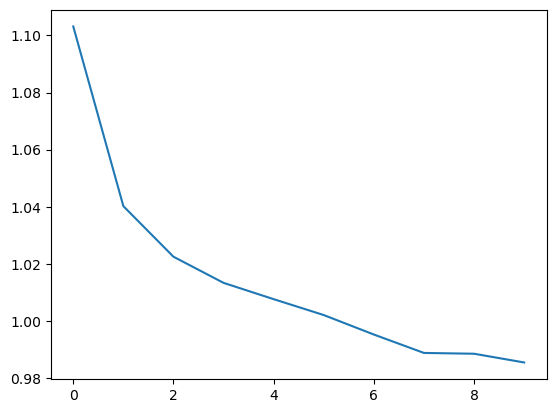

In [27]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(losses))), losses)

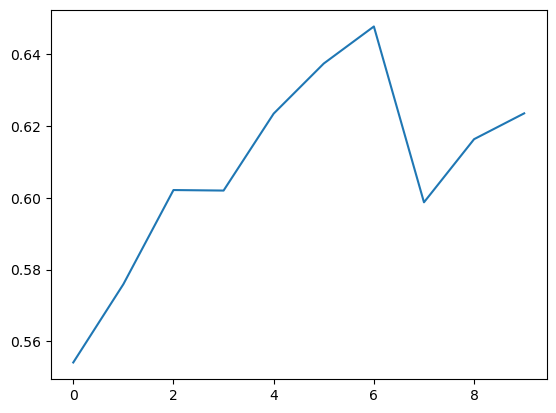

In [28]:
plt.plot(list(range(len(losses))), accuracies)

In [29]:
emb_model.load_state_dict(best_weights)

<All keys matched successfully>

In [30]:
emb_model.eval()
with torch.no_grad(), tqdm(total=len(np.unique(test_table.id_video.values))) as t:
    accuracy = 0
    for k, id_video in enumerate(np.unique(test_table.id_video.values)):
        id_video_sample = test_table[test_table.id_video == id_video]
        category = id_video_sample.loc[:, 'prob_1': 'prob_4'].iloc[0].values
        video_category = np.argmax(category)
        frames_categories = list()
        for i in range(id_video_sample.shape[0]):
            row = id_video_sample.iloc[i]
            embedding = row[5:]
            embedding = torch.tensor(embedding.values)
            embedding = torch.unsqueeze(embedding, dim=0)
            out = emb_model(embedding.float())
            frames_categories.append(torch.argmax(out, dim=1)[0].cpu().numpy())

        most_freq_value = max(frames_categories, key=frames_categories.count)
        accuracy = (accuracy * k + int(most_freq_value == video_category)) / (k + 1)
        t.set_postfix_str(f'Video accuracy: {accuracy}')
        t.update(1)

100%|██████████| 50/50 [00:10<00:00,  4.66it/s, Video accuracy: 0.8]               
